In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [12]:
retail = pd.read_csv("OnlineRetail.csv", encoding="unicode_escape")

In [13]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
retail.shape

(541909, 8)

In [15]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [16]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Step 2 : Data cleaning

In [17]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
round((retail.isna().sum()/retail.shape[0]*100), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [19]:
retail.dropna(inplace=True)
retail.shape

(406829, 8)

In [20]:
406829/541909 

0.750733056657114

In [21]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [23]:
retail.loc[:, 'CustomerID'] = retail.loc[:, 'CustomerID'].astype(str)

In [24]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

# Step 3: Data preparation

* R (Recency): Number of days since last purchase of customer. 
* F (Frequency): Number of transactions of customers. 
* M (Monetary): Total amount of transactions (revenue contributed by each customer).

In [25]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
retail['Amount'] = retail.Quantity * retail.UnitPrice
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [28]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [30]:
retail[retail['CustomerID'] == '12347.0']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,12347.0,Iceland,25.20
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,12347.0,Iceland,17.00
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,12347.0,Iceland,39.00
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,12347.0,Iceland,23.40
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/2010 14:57,1.25,12347.0,Iceland,15.00
...,...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/2011 15:52,0.85,12347.0,Iceland,8.50
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/2011 15:52,1.95,12347.0,Iceland,23.40
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/2011 15:52,0.83,12347.0,Iceland,13.28
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/2011 15:52,0.42,12347.0,Iceland,8.40


In [31]:
retail[retail['CustomerID'] == '12347.0']['Amount'].sum()

4310.000000000001

In [32]:
m = pd.DataFrame(rfm_m)
m.reset_index(inplace = True)
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# How many bills are generated on a particular customerID

In [33]:
retail.groupby('CustomerID')['InvoiceNo'].count()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

# Which bill numbers are associatd with customerID = 12347

In [35]:
retail[retail['CustomerID'] == '12347.0']['InvoiceNo'].unique()

array(['537626', '542237', '549222', '556201', '562032', '573511',
       '581180'], dtype=object)

In [36]:
len(retail[retail['CustomerID'] == '12347.0']['InvoiceNo'].unique())

7

In [37]:
rfm_f = retail.groupby(['CustomerID','InvoiceNo']).size().groupby(level = 0).count()
rfm_f

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Length: 4372, dtype: int64

In [38]:
f = pd.DataFrame(rfm_f)
f.reset_index(inplace = True)
f.head()

,CustomerID,0
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [41]:
retail.groupby(['CustomerID','InvoiceNo']).size().groupby(level = 0).count()

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Length: 4372, dtype: int64

In [42]:
rfm = pd.merge(m, f, on = 'CustomerID', how='inner')
rfm.columns = ['CustomerID','Amount','Frequency']
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


In [43]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

# How much is the difference between the purchases 

In [48]:
#Recency

In [49]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = '%m/%d/%Y %H:%S')

In [50]:
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:00:50')

In [51]:
retail['DIFF'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,DIFF
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:00:26,2.55,17850.0,United Kingdom,15.30,373 days 04:00:24
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:00:26,3.39,17850.0,United Kingdom,20.34,373 days 04:00:24
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:00:26,2.75,17850.0,United Kingdom,22.00,373 days 04:00:24
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:00:26,3.39,17850.0,United Kingdom,20.34,373 days 04:00:24
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:00:26,3.39,17850.0,United Kingdom,20.34,373 days 04:00:24


In [52]:
rfm_r = retail.groupby('CustomerID')['DIFF'].min()
rfm_r

CustomerID
12346.0   325 days 02:00:33
12347.0     1 days 20:59:58
12348.0    74 days 23:00:37
12349.0    18 days 02:59:59
12350.0   309 days 20:00:49
                 ...       
18280.0   277 days 02:59:58
18281.0   180 days 01:59:57
18282.0     7 days 01:00:07
18283.0     3 days 00:00:48
18287.0    42 days 03:00:21
Name: DIFF, Length: 4372, dtype: timedelta64[ns]

In [53]:
r = pd.DataFrame(rfm_r)
r.reset_index(inplace = True)
r.head()

,CustomerID,DIFF
0,12346.0,325 days 02:00:33
1,12347.0,1 days 20:59:58
2,12348.0,74 days 23:00:37
3,12349.0,18 days 02:59:59
4,12350.0,309 days 20:00:49


In [54]:
r.columns = ['CustomerID', 'Recency']
r['Recency'] = r['Recency'].dt.days
r.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [55]:
retail[retail['CustomerID'] == '12347.0']['DIFF'].unique()

array([31701593000000000, 27381620000000000, 21261607000000000,
       15807649000000000, 11160002000000000,  3369625000000000,
         161998000000000], dtype='timedelta64[ns]')

In [56]:
rfm = pd.merge(rfm, r, on = 'CustomerID', how='inner')
rfm.columns = ['CustomerID','Amount','Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


In [58]:
rfm_df = rfm[['Amount','Frequency','Recency']]

scaler = StandardScaler()

rfm_df_scaled =scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.23100099, -0.32936215,  2.32202285],
       [ 0.29343167,  0.20610242, -0.89373323],
       [-0.01231622, -0.11517632, -0.1691956 ],
       ...,
       [-0.20951263, -0.22226923, -0.83418219],
       [ 0.02390005,  1.16993863, -0.87388289],
       [-0.00744423, -0.22226923, -0.48680114]])

# Step : Building Model

In [59]:
ssd = []
range_cluster = [2,3,4,5,6,7,8]
for i in range_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
ssd

[9134.689127794292,
 5530.488183884868,
 4046.2849223509506,
 3020.015648195015,
 2369.6644570655244,
 1906.0491795763862,
 1585.369518213447]

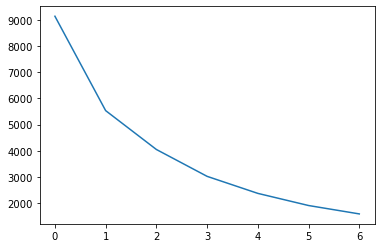

In [60]:
plt.plot(ssd)

In [61]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [75]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [85]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Label,Cluster_Id
0,12346.0,0.00,2,325,1,1
1,12347.0,4310.00,7,1,0,0
2,12348.0,1797.24,4,74,0,0
3,12349.0,1757.55,1,18,0,0
4,12350.0,334.40,1,309,1,1


In [88]:
rfm = rfm.drop('Label', axis = 1)

In [89]:
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,7,1,0
2,12348.0,1797.24,4,74,0
3,12349.0,1757.55,1,18,0
4,12350.0,334.40,1,309,1


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

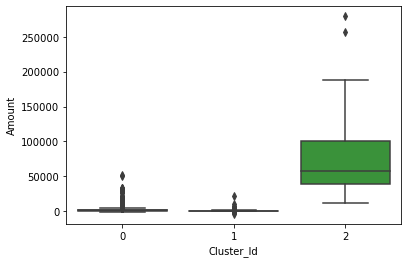

In [93]:
sns.boxplot(x = 'Cluster_Id', y = 'Amount', data = rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

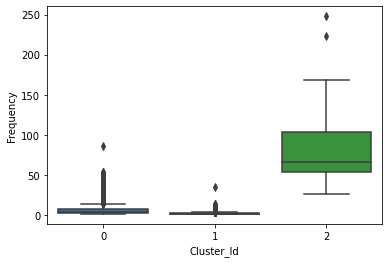

In [94]:
sns.boxplot(x = 'Cluster_Id', y = 'Frequency', data = rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

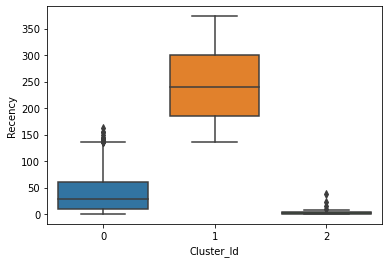

In [95]:
sns.boxplot(x = 'Cluster_Id', y = 'Recency', data = rfm)

In [96]:
rfm[rfm['Cluster_Id']==2]

,CustomerID,Amount,Frequency,Recency,Cluster_Id
55,12415.0,123725.45,26,23,2
330,12748.0,29072.10,224,0,2
487,12971.0,10930.26,89,3,2
568,13089.0,57385.88,118,2,2
803,13408.0,27487.41,81,1,2
1005,13694.0,62653.10,60,3,2
1078,13798.0,36351.42,63,0,2
1300,14096.0,57120.91,34,3,2
1345,14156.0,113384.14,66,9,2
1447,14298.0,50862.44,45,2,2


# Conclusion 

In [ ]:
* People belongs to cluster 2 have spent more than the people belongs to other cluster, followed by cluster 1
* People belongs to cluster 2 have visited more than the people belongs to other cluster, followed by cluster 1
* People belongs to cluster 2 are the most rececnt visited customer, followed by cluster 1

* Company should focus more on the people who belongs to cluster 2